# Exploratory Data Analysis on Superstore Dataset

You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

Dataset : https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view?usp=sharing

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv("dataset\SampleSuperstore.csv")

df.shape

(9994, 13)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Columns of Dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
# Check for Missing Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Check for duplicate values
df.duplicated().sum()

17

In [10]:
# Dropping duplicate values
df.drop_duplicates(subset=None,keep="first",inplace=True)


In [11]:
df.duplicated().sum()

0

In [12]:
# Number of unique values in dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

By this we can observe information is related to only one country,so there is no affect in analysing it.

In [13]:
# Dropping the Country column
df = df.drop(columns=['Country'], axis=1)
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Analysis of data-"Product level"

In [17]:
#For each category
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
# Count for each Category
df["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

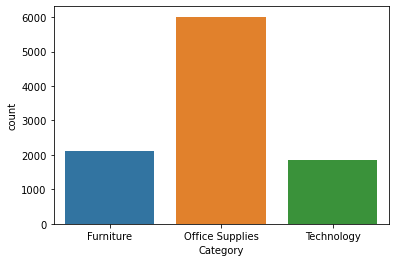

In [20]:
#Visualisation
sns.countplot(x='Category', data=df)
plt.show()

``` By this plot we can observe that office supplies have more supplies```

In [21]:
# For each sub-category
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [22]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

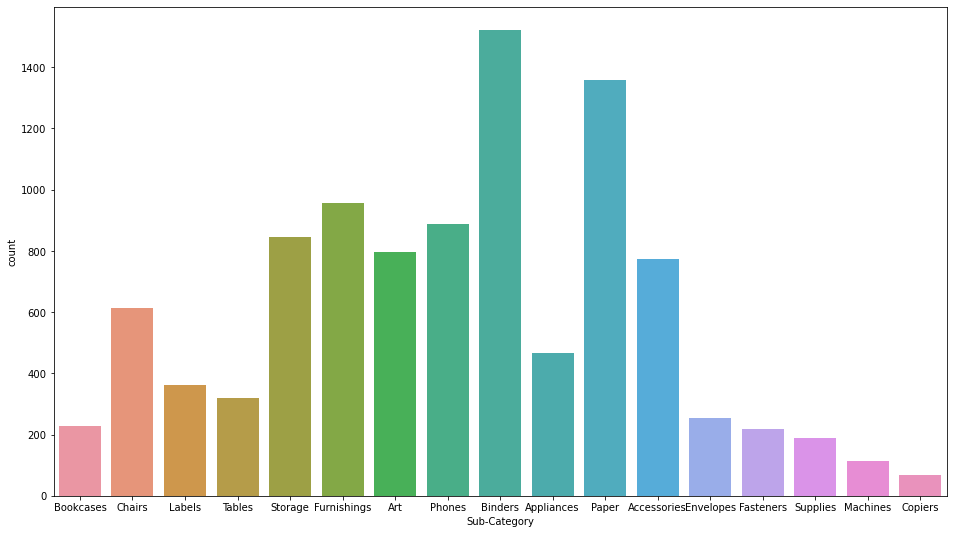

In [122]:
# Visualisation
plt.figure(figsize=(16,9))
sns.countplot(x="Sub-Category", data=df)
plt.show()

``` Binder and Paper is having more demand as per sub-category ```

<Figure size 1152x648 with 0 Axes>

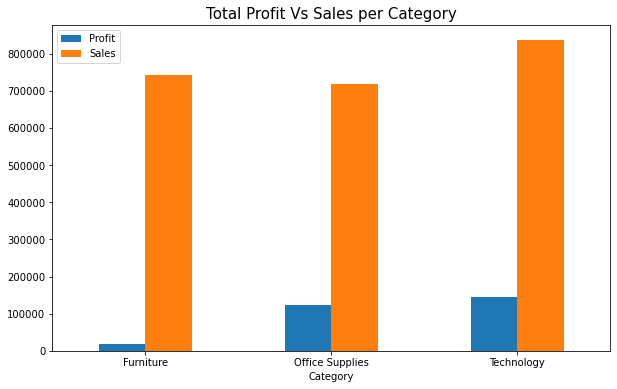

In [117]:
# Plot on Total Profit Vs Sales per Category

plt.figure(figsize=(16,9))
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize=(10,6))
plt.title('Total Profit Vs Sales per Category', fontsize="15")
plt.legend(loc=2)
plt.xticks(rotation=0)
plt.show()

```By this we can observe furniture section as very less profit although it has good sales.
 Technology section has good profit and sales```

<Figure size 1152x648 with 0 Axes>

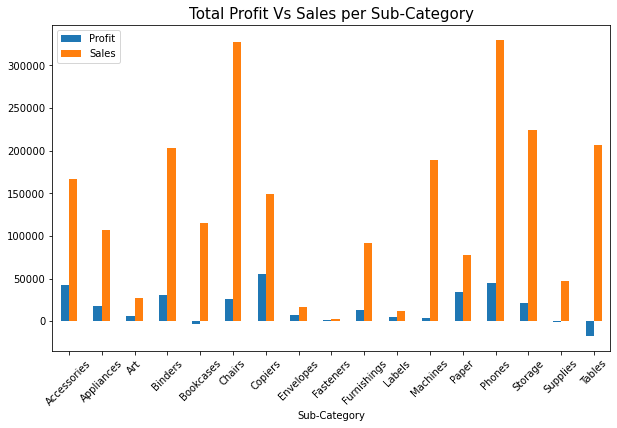

In [119]:
# Plot on Total Profit Vs Sales per Sub-Category

plt.figure(figsize=(16,9))
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(figsize=(10,6))
plt.title('Total Profit Vs Sales per Sub-Category', fontsize="15")
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

```By this we can observe Copiers,Phones,Paper and accessories give more profit,loss in selling Tables and Book cases```

<Figure size 1152x648 with 0 Axes>

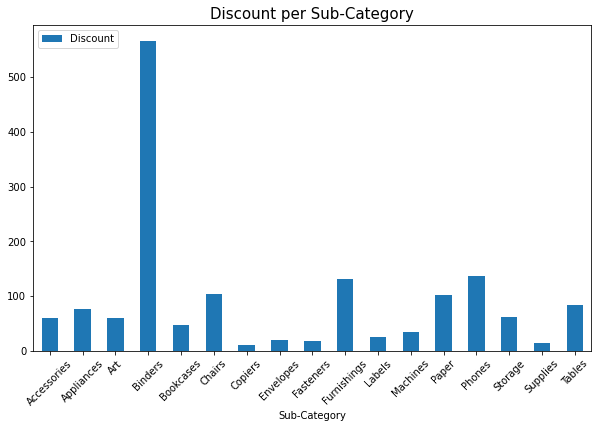

In [124]:
# Plot on Discount per Sub-Category

plt.figure(figsize=(16,9))
df.groupby('Sub-Category')[['Discount']].sum().plot.bar(figsize=(10,6))
plt.title('Discount per Sub-Category', fontsize="15")
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

```More discount was given for binder that may be reason to increase the sell of binder```

<Figure size 1152x648 with 0 Axes>

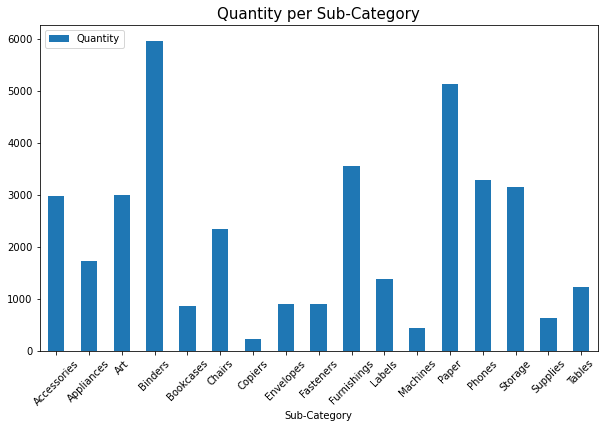

In [129]:
# Plot on Quantity per Sub-Category

plt.figure(figsize=(16,9))
df.groupby('Sub-Category')[['Quantity']].sum().plot.bar(figsize=(10,6))
plt.title('Quantity per Sub-Category', fontsize="15")
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

``` By this we can observe binder and paper are sold in more quantity. ```

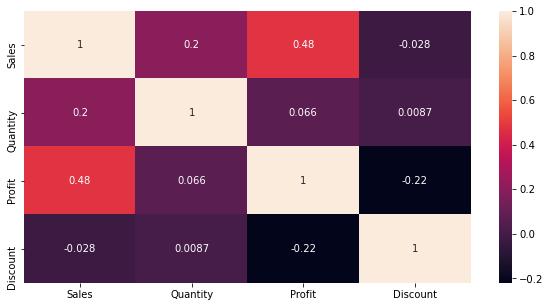

In [128]:
# Correlation and Heatmap
plt.figure(figsize=(10,5))
df2=df[['Sales','Quantity','Profit','Discount']]
sns.heatmap(df2.corr(),annot=True)
plt.show()

```By this we can observe the positive correlation between Profit and sales,can observe when sales increases the profit also increases.```

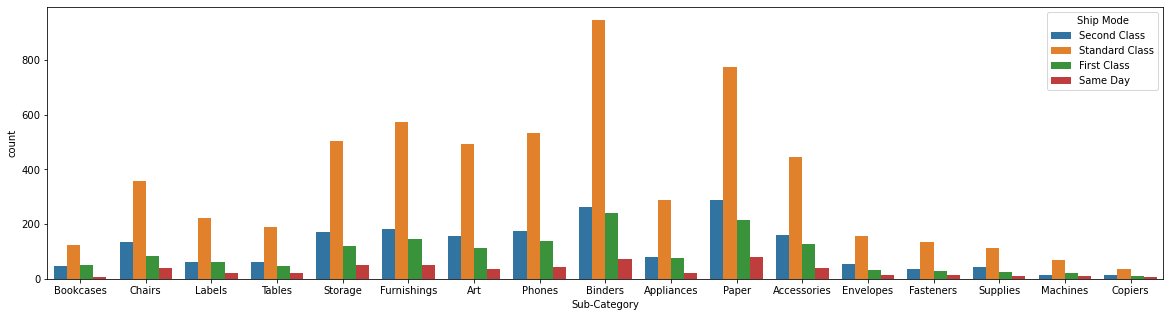

In [168]:
# Count of Category : Ship Mode
plt.figure(figsize=(20,5))
sns.countplot(x="Sub-Category", hue="Ship Mode",data=df)
plt.show()

``` Standard class mode is mostly used for delivery ```

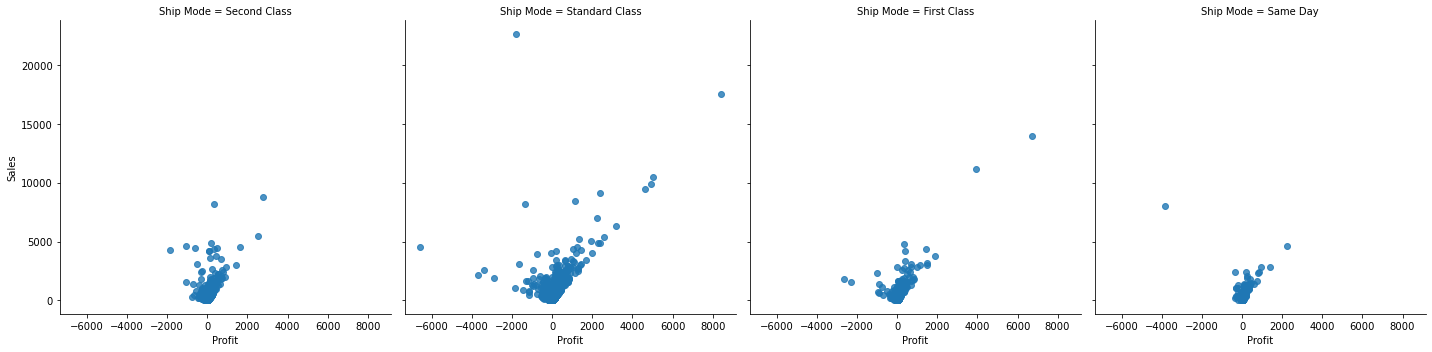

In [131]:
# Plot of Profit & Sales with different Ship Mode

sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Ship Mode")
plt.show()

```By this we can observe profit is very high when ship mode is standard class. ```

### Consumer Analytics

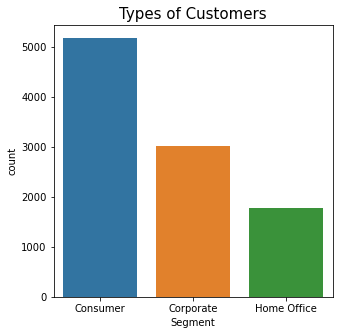

In [165]:
# Customer Type
plt.figure(figsize=(5,5))
sns.countplot(x='Segment',data=df)
plt.title("Types of Customers", fontsize="15")
plt.show()

``` Consumer segment has more distribution```

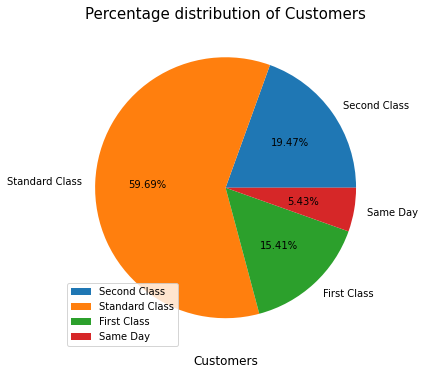

In [162]:
# Distributions of Customers
storesecond = df[df["Ship Mode"] == "Second Class"]
storestand = df[df["Ship Mode"] == "Standard Class"]
storefirst = df[df["Ship Mode"] == "First Class"]
storesame = df[df["Ship Mode"] == "Same Day"]

x = ["Second Class", "Standard Class", "First Class", "Same Day"]
y = [len(storesecond.index),len(storestand.index),len(storefirst.index),len(storesame.index)]

plt.figure(figsize=(6,6))
plt.pie(y,labels = x,autopct="%1.2f%%")
plt.title("Percentage distribution of Customers", fontsize="15")
plt.xlabel("Customers", fontsize="12")
plt.legend(loc=3)
plt.grid(True)
plt.show()

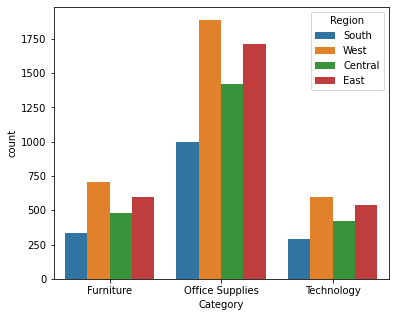

In [166]:
# Count of Category : Region-wise
plt.figure(figsize=(6,5))
sns.countplot(x='Category',hue="Region",data=df)
plt.show()

``` By this we can observe people from west and east part are ordering more from sample store```

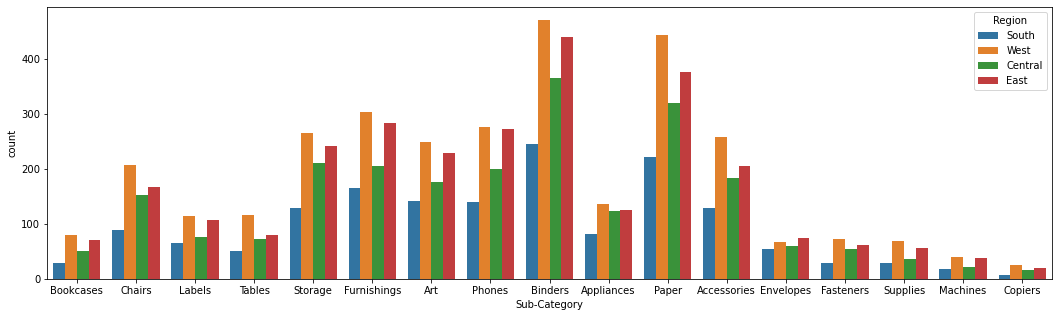

In [167]:
# Count of Sub-Category : Region-wise
plt.figure(figsize=(18,5))
sns.countplot(x='Sub-Category',hue="Region",data=df)
plt.show()

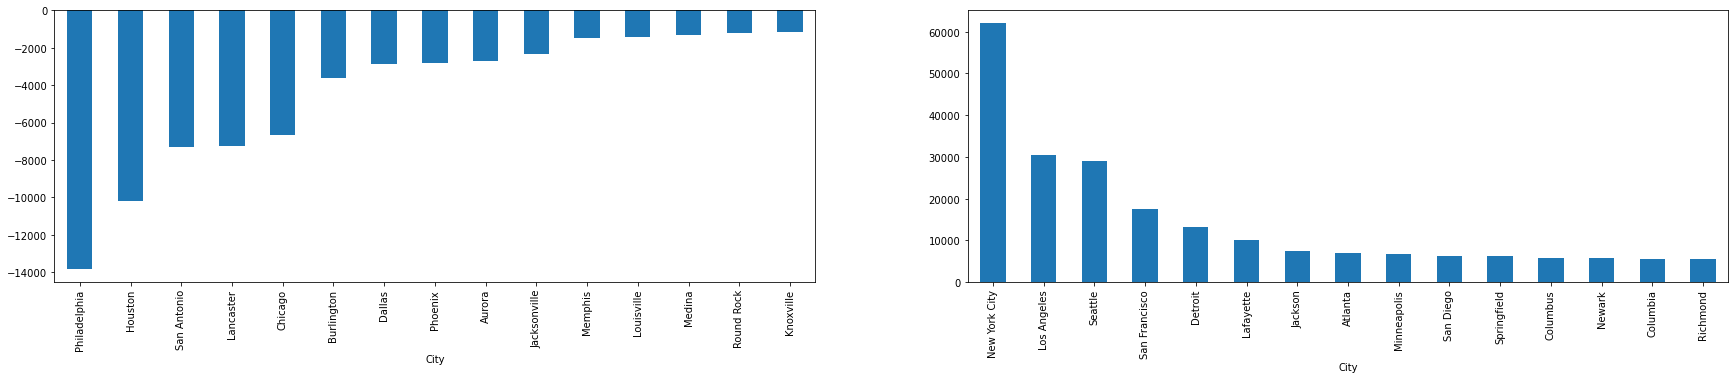

In [136]:
#Profit and loss: City-wise
fig, axes = plt.subplots(1,2,figsize=(30,5))
df.groupby('City').sum()['Profit'].sort_values(ascending=True).head(15).plot.bar(ax=axes[0])
df.groupby('City').sum()['Profit'].sort_values(ascending=False).head(15).plot.bar(ax=axes[1])
plt.show()

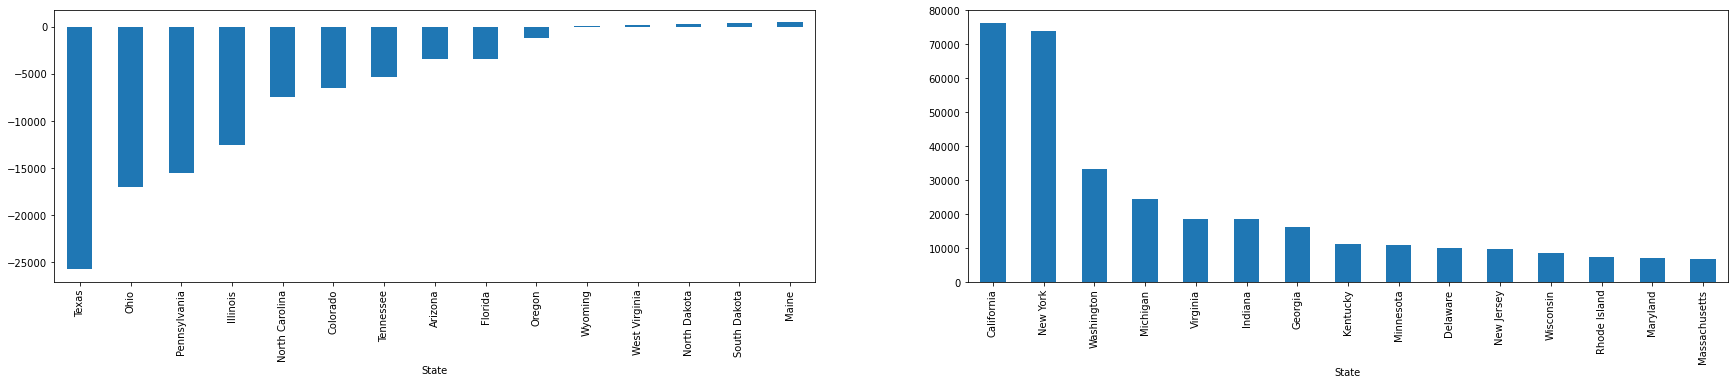

In [137]:
# Profit and loss : State-wise
fig, axes = plt.subplots(1,2,figsize=(30,5))
df.groupby('State').sum()['Profit'].sort_values(ascending=True).head(15).plot.bar(ax=axes[0])
df.groupby('State').sum()['Profit'].sort_values(ascending=False).head(15).plot.bar(ax=axes[1])
plt.show()

 ###  Insights derived from the above EDA:
 
 - Imporovements should be made for same day shipment mode.

 - We have to work more in the Southern region of USA for better business.

 - Office Supplies are excellent. We have to work more on Furniture and Technology Category of business.

 - There are very less people working as Copiers. So, the recruitment should be increased.

 - Maximum number of people are from California and New York. We should expand in other parts of USA as well.

 - Profit and Sales are not too much related, i.e., they are not directly proportional. Hence we have tp work separately gor increasing bith, sales and profit.

 - Profit and Discount show very weak and negative relationship. That should be kept in mind before taking any other decision related to business.